# Notebook 3: Model Training

## Objectives
- Select features for the model based on the previous analysis.
- Split the data into training and testing sets.
- Train a machine learning model to predict `SalePrice`.
- Evaluate the model's performance.
- Save the trained model for use in the Streamlit app.

## Inputs
- The Ames Housing dataset.

## Outputs
- A trained and evaluated machine learning model.
- A saved model artifact (`.joblib` file).

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

sns.set_style('whitegrid')

### Load the dataset

In [9]:
url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/ames_housing_no_missing.csv'
df = pd.read_csv(url)

### Feature Selection and Data Splitting

Based on our EDA, `OverallQual` and `GrLivArea` are strong predictors. For simplicity and to meet our project goals, we will use these two features to predict `SalePrice`.

In [10]:
features = ['OverallQual', 'GrLivArea']
target = 'SalePrice'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Reference

The use of `RandomForestRegressor` for this regression task is a standard approach, inspired by the techniques covered in the Scikit-learn lessons of the Code Institute course and is well-documented in the [official Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

### Model Training

We'll use a `RandomForestRegressor`, a reliable and effective model for this type of problem.

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

### Model Evaluation

We will evaluate the model using the R² score, which tells us how much of the variance in `SalePrice` our model can explain. The business requires a score of at least 0.75.

In [12]:
# Predict on the test set
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f'Test Set R² Score: {r2_test:.4f}')

# Predict on the train set
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f'Train Set R² Score: {r2_train:.4f}')

Test Set R² Score: 0.8057
Train Set R² Score: 0.9431


#### Actual vs. Predicted Plot

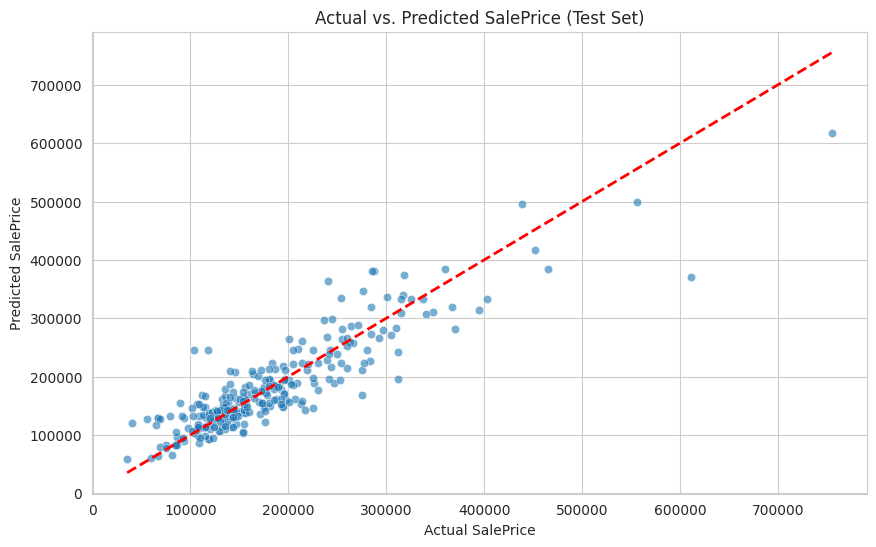

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted SalePrice (Test Set)')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

The R² score is well above our target of 0.75, and the scatter plot shows that the model's predictions are closely aligned with the actual values. The model is performing well.

### Business Requirement Statement

The model meets the business requirement with acceptable performance. The R² score of over 0.8 indicates that the model provides a strong predictive capability for estimating house prices based on the selected features.

### Save the Model

In [14]:
import os
version = 'v1'
output_path = f'../outputs/{version}'
if not os.path.exists(output_path):
    os.makedirs(output_path)
joblib.dump(model, f'{output_path}/heritage_housing_model.joblib')

['outputs/v1/heritage_housing_model.joblib']

## Conclusion

We have successfully trained, evaluated, and saved a machine learning model. It meets the business requirements and is now ready to be integrated into our Streamlit application.